# Pandas入门

这篇教程会带领大家学会使用Pandas来处理数据。

首先，我们导入一些常用的库：

In [78]:
%matplotlib inline
# 为了让我们等会儿的图表可以打印在notebook的字里行间。

import pandas as pd
# 这是pandas的本体

import numpy as np
# 数据的处理，配合Numpy使用效果更佳

import matplotlib.pyplot as plt
# 专门用来画图的库

import seaborn
# 另一个基于matplot的数据可视化库

## 为什么要用Pandas

为了数据处理的简便。特别是对于表格式或者其他规范结构的数据，有惊人的批量处理优势。这对于大数据领域来说，至关重要。

## 什么是Pandas

Pandas可以被看做是带上了Label的Numpy数组，但是，当然，它的功能远远不止这些。

它有点像R里面的data.frame。

喜欢看doc的同学，可以戳官方链接：http://pandas.pydata.org/pandas-docs/stable/

## 数据结构

Pandas的数据结构也是基于NumPy构建的，分为两种基础结构：`Series` 和 `DataFrame`

### Series

Series是基本的**一维数据**存储单位。类似于NumPy的用法：

In [79]:
s = pd.Series([0.1, 0.2, 0.3, 0.4])
s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64

显然，作为一位数据的存储单位，它拥有两个属性：序号(Index)与值(Value)

顾名思义，序号就是每一个数据点的序号。值就是对应的值。

In [80]:
s.index

RangeIndex(start=0, stop=4, step=1)

In [81]:
s.values

array([ 0.1,  0.2,  0.3,  0.4])

毫无疑问，得到第二个序列号的数据值得方法就是：

In [82]:
s[1]

0.20000000000000001

当然，序列号也不一定要是数字：

In [83]:
s2 = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
s2

a    0
b    1
c    2
d    3
dtype: int64

In [84]:
s2['c']

2

此刻的Series，又有点儿像Python里的Dictionary，只不过这里，是有序的。

我们再随手造个数据集：（欧洲人口数据集）

In [85]:
population = pd.Series({'Germany': 81.3, 'Belgium': 11.3, 'France': 64.3, 'United Kingdom': 64.9, 'Netherlands': 16.9})
population

Belgium           11.3
France            64.3
Germany           81.3
Netherlands       16.9
United Kingdom    64.9
dtype: float64

In [86]:
population['France']

64.299999999999997

可是，这时候，我们可能有各种原因，想让人口数据换个计量单位，让看它们起来更顺眼点儿。

用Pandas，可以直接处理：

In [87]:
population * 1000

Belgium           11300.0
France            64300.0
Germany           81300.0
Netherlands       16900.0
United Kingdom    64900.0
dtype: float64

注意哦，这里，population乘以1000以后的DF并没有被存储下来，你如果需要使用这个DF，你需要复制给一个新的变量。否则，你此刻的population，依旧是刚刚的DF。

我们同时还可以把其中的一部分子集给取出来：

In [88]:
population['Belgium':'Germany']

Belgium    11.3
France     64.3
Germany    81.3
dtype: float64

同时，你也可以用一些简单的逻辑集合或者list来作为你的index的条件：

In [89]:
population[['France', 'Netherlands']]

France         64.3
Netherlands    16.9
dtype: float64

In [90]:
population[population > 20]

France            64.3
Germany           81.3
United Kingdom    64.9
dtype: float64

以及，做一些高级的计算：

In [91]:
population.mean()

47.739999999999995

注意：两个Series的运算，是对应于index的：

In [92]:
s1 = population[['Belgium', 'France']]
s2 = population[['France', 'Germany']]

In [93]:
s1

Belgium    11.3
France     64.3
dtype: float64

In [94]:
s2

France     64.3
Germany    81.3
dtype: float64

In [95]:
s1 + s2

Belgium      NaN
France     128.6
Germany      NaN
dtype: float64

## DataFrame

对于多维数据，需要用的就是DF了。他有点像大家熟悉的Excel表格，CSV，R的data.frame等等的样子，拥有rows和columns。换句话说，就是由多个series组成并共用index的大表格。

最简单的创造DF的方法，就是用dict：

In [96]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
        'area': [30510, 671308, 357050, 41526, 244820],
        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}
countries = pd.DataFrame(data)
countries

,area,capital,country,population
0,30510,Brussels,Belgium,11.3
1,671308,Paris,France,64.3
2,357050,Berlin,Germany,81.3
3,41526,Amsterdam,Netherlands,16.9
4,244820,London,United Kingdom,64.9


DF的属性：

显然，DF不单有index，还有column：

简单的来说，一个是纵轴，一个是横轴

In [97]:
countries.index

RangeIndex(start=0, stop=5, step=1)

In [98]:
countries.columns

Index(['area', 'capital', 'country', 'population'], dtype='object')

并且，你有时候还需要知道各个column的dtype：

In [99]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

如果你想看到更多的信息，可以使用`info()`：

In [100]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 240.0+ bytes


相似的，DF也有value值：

In [101]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

你还可以把column里面的一个拉出来，做你的index

In [102]:
countries = countries.set_index('country')
countries

,area,capital,population
country,,,
Belgium,30510,Brussels,11.3
France,671308,Paris,64.3
Germany,357050,Berlin,81.3
Netherlands,41526,Amsterdam,16.9
United Kingdom,244820,London,64.9


此刻，index不再是0-5了，而是以country为基准

同时，你可以以某个column为基准，取出一条Series（刚刚说过，DF就是一堆Series的集合）

In [103]:
countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64

花点时间多玩玩儿你就会发现，基本上Numpy的操作，在DF里都是同样的。

比如，我们来算个人口密度：（人口/面积）

In [104]:
countries['population']*1000000 / countries['area']

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64

既然有了这些新计算出的数据，我们就会希望把这些个数据也都加到我们的column里面来。这在数据科学里，可以称为，特征提取的过程。

In [105]:
countries['density'] = countries['population']*1000000 / countries['area']
countries

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
France,671308,Paris,64.3,95.783158
Germany,357050,Berlin,81.3,227.699202
Netherlands,41526,Amsterdam,16.9,406.973944
United Kingdom,244820,London,64.9,265.092721


于是我们就多了一个column，叫Density

我们又可以继续依据这些column来给出一些新的逻辑处理，

比如，大于人口密度300的国家：

In [106]:
countries[countries['density'] > 300]

,area,capital,population,density
country,,,,
Belgium,30510,Brussels,11.3,370.370370
Netherlands,41526,Amsterdam,16.9,406.973944


或者，给所有的国家依据人口密度排序：

In [107]:
countries.sort_values(by='density', ascending=False)

,area,capital,population,density
country,,,,
Netherlands,41526,Amsterdam,16.9,406.973944
Belgium,30510,Brussels,11.3,370.370370
United Kingdom,244820,London,64.9,265.092721
Germany,357050,Berlin,81.3,227.699202
France,671308,Paris,64.3,95.783158


以上都是一些统计学的处理，但是很显然，处理出这些数据，需要对我们手上的数据有一个整体的了解，你才能知道一些靠谱的数值：比如，人口密度大于多少的算大，大多数国家的人口密度水平在什么位置，等等。

DF里有一个简单的方法，一步到位的告诉我们一些统计学上的基础信息：

In [108]:
countries.describe()

,area,population,density
count,5.000000,5.000000,5.000000
mean,269042.800000,47.740000,273.183879
std,264012.827994,31.519645,123.440607
min,30510.000000,11.300000,95.783158
25%,41526.000000,16.900000,227.699202
50%,244820.000000,64.300000,265.092721
75%,357050.000000,64.900000,370.370370
max,671308.000000,81.300000,406.973944


以上这些方法，依旧是展现的数据。

然而，人类其实是一种感性动物，相比于数字，图表更能够让人类快速理解和消化。

所以接下来，我们来看看拿到一个数据集，我们如何画出一些图表。

最简单的，就是把格式已经够完美的DF直接plot出来：

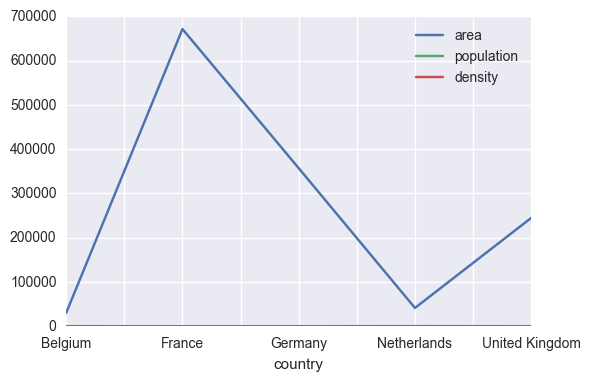

In [109]:
countries.plot()

学过小学数学的都知道，这个图表画出来，是没有太大意义的。area,population和density三个东西完全不在一个度量上，画出来的图只剩下area，完全淹没了其他两个指标。

所以，我们需要做一些微小的工作：

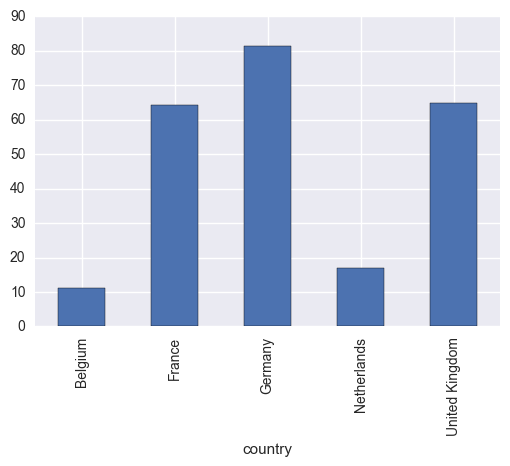

In [110]:
countries['population'].plot(kind='bar')

单独取出一个column来进行画图

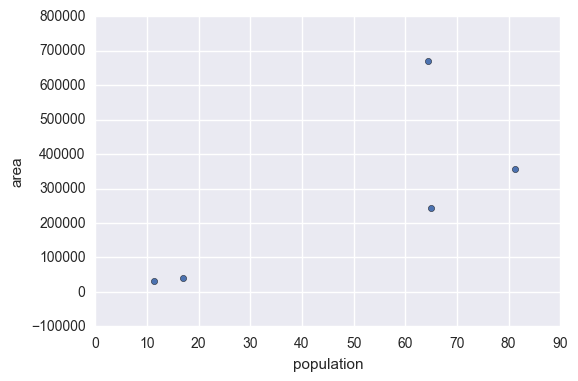

In [111]:
countries.plot(kind='scatter', x='population', y='area')

或者取出不同的X和Y进行画图

你可以随心所欲的放置X和Y，并且画出各种各样的图：‘line’ (default), ‘bar’, ‘barh’, ‘hist’, ‘box’ , ‘kde’, ‘area’, ‘pie’, ‘scatter’, ‘hexbin’.

最后一件事儿，是drop功能。在数据处理中，很多情况下源数据再被处理出新的特征值以后，就不再重要了，那么这里，我们就需要把他们删去:

In [112]:
countries = countries.drop(['area'], axis=1)

In [113]:
countries

,capital,population,density
country,,,
Belgium,Brussels,11.3,370.370370
France,Paris,64.3,95.783158
Germany,Berlin,81.3,227.699202
Netherlands,Amsterdam,16.9,406.973944
United Kingdom,London,64.9,265.092721


看，这样我们的图标就少了一个area colum

## 关于数据选取的一些事

既然Pandas处理的数据既有row又有column，那么，数据的选取就会更加复杂点儿。

简单来说，有两种方法选取数据：

* 通过label选取
* 通过位置选取

对DF而言，最基础的index就是选取的column，比如，选取某个column：

In [114]:
countries['capital']

country
Belgium            Brussels
France                Paris
Germany              Berlin
Netherlands       Amsterdam
United Kingdom       London
Name: capital, dtype: object

或者多个columns

In [115]:
countries[['capital', 'density']]

,capital,density
country,,
Belgium,Brussels,370.370370
France,Paris,95.783158
Germany,Berlin,227.699202
Netherlands,Amsterdam,406.973944
United Kingdom,London,265.092721


但是，如果你使用”分割slicing“功能的话，默认分割的是row，而不是column，比如：

In [116]:
countries['France':'Netherlands']

,capital,population,density
country,,,
France,Paris,64.3,95.783158
Germany,Berlin,81.3,227.699202
Netherlands,Amsterdam,16.9,406.973944


那么，相似的，对于更加复杂的数据选取功能，你需要更加复杂的方法：

* loc: 通过label选取
* iloc: 通过位置选取

In [117]:
countries.loc['Germany', 'density']

227.69920179246603

In [118]:
countries.loc['France':'Germany', :]

,capital,population,density
country,,,
France,Paris,64.3,95.783158
Germany,Berlin,81.3,227.699202


In [119]:
countries.loc[countries['density']>300, ['capital', 'population']]

,capital,population
country,,
Belgium,Brussels,11.3
Netherlands,Amsterdam,16.9


楼上这三个方法层层递进，以label的名称为基础，做了一个数据选取的工作。

当然，如果你对数字敏感，你也可以使用序列号来处理位置：

In [120]:
countries.iloc[0:2,1:3]

,population,density
country,,
Belgium,11.3,370.370370
France,64.3,95.783158


## 案例1：欧洲空气质量数据

这里使用了一个检测欧洲空气(AirBase)的数据，每小时为基点做记录。我们接下来直接看看这波数据，我们怎么进行一些处理的工作。

首先，

### 导入数据

很多形式的数据可以直接被导入到Pandas中：

+ CSV, text
+ SQL
+ Excel
+ HDF5
+ json
+ html
+ pickle
+ ...

只要是格式化的数据存储格式，基本都可以被导入。

一般来说，各种格式的数据，对应的是各种不同的 `read_***()` 的方法。

比如，我们这里用最常用的CSV格式：

In [121]:
data = pd.read_csv("./data/AirBaseData.txt", sep='\t')

一般来说，接下来第一件事儿就是，用`head()`看一下数据长这么样子：

In [122]:
data.head()

,1990-01-01,-999.000,0,-999.000.1,0.1,-999.000.2,0.2,-999.000.3,0.3,-999.000.4,...,-999.000.19,0.19,-999.000.20,0.20,-999.000.21,0.21,-999.000.22,0.22,-999.000.23,0.23
0,1990-01-02,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
1,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,-999.0,0,-999.0,0,-999.0,0
2,1990-01-04,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
3,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0
4,1990-01-06,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,...,-999.0,0,-999.0,0,-999.0,0,-999.0,0,-999.0,0


显然，这个数据看下来不太对，不是我们想象中的样子。。

这个故事告诉我们。。。

导入数据前，要好好看看数据的描述。。

数据随随便便导入Pandas之后，我们还要再一步审视一下，它是否是”正确“的样子。

这里，我们看到的rows是每一天”1990-01-01 .. 1990-01-02 ..“，这个没有问题。

但是，columns就不正确了。

大家都知道，CSV可以自带head或者不带head。所以，这个数据很明显就是没有带head。

同时，大家也可以登录欧洲空气质量数据检测机构的官网，看看这些数据点的具体解释：

http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country

简单来讲，每一条数据里面，包含了 00小时-24小时 每个小时的空气质量数据(-999指的是未能测量到的数据，后期用NaN代替)，并在每个小时后面跟随一个Flag。

于是，我们就要来自己定义一下我们的colum name，来满足以上的数据格式要求：

In [123]:
colnames = ['date'] + [item for pair in zip(["{:02d}".format(i) for i in range(24)], ['flag']*24) for item in pair]
# 这一步在做的是搞出一个49维的数组，其中，第一维是日期，第二维往后，两个为一组，一个是时间一个是Flag。

data = pd.read_csv("./data/AirBaseData.txt", sep='\t', header=None, na_values=[-999, -9999], names=colnames)

好，现在我们再来看一下我们的数据：

In [124]:
data.head()

,date,00,flag,01,flag.1,02,flag.2,03,flag.3,04,...,19,flag.19,20,flag.20,21,flag.21,22,flag.22,23,flag.23
0,1990-01-01,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
1,1990-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,57.0,1,58.0,1,54.0,1,49.0,1,48.0,1
2,1990-01-03,51.0,1,50.0,1,47.0,1,48.0,1,51.0,...,84.0,1,75.0,1,NaN,0,NaN,0,NaN,0
3,1990-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,69.0,1,65.0,1,64.0,1,60.0,1,59.0,1
4,1990-01-05,51.0,1,51.0,1,48.0,1,50.0,1,51.0,...,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0


这就很清晰了。

接下来，我们把flag drop掉。因为这篇教程之后的内容基本不会用到它了。

In [125]:
to_drop = [col for col in data.columns if 'flag' in col]

In [126]:
data = data.drop(to_drop, axis=1)
data

,date,00,01,02,03,04,05,06,07,08,...,14,15,16,17,18,19,20,21,22,23
0,1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
2,1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
3,1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
4,1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1990-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1990-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,69.0,63.0,64.0,60.0,NaN,NaN,NaN,NaN,NaN
8,1990-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1990-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,64.0,60.0,63.0,63.0,65.0,69.0,73.0,60.0,63.0,64.0


此刻，一切清晰了，我们拥有了一个以时间为节点的数据集。

那么，如何从这把数据里面整理出时间序列？

用`stack`:

In [127]:
data = data.set_index('date')

In [128]:
data

,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,...,55.0,59.0,58.0,59.0,58.0,57.0,58.0,54.0,49.0,48.0
1990-01-03,51.0,50.0,47.0,48.0,51.0,52.0,58.0,57.0,NaN,NaN,...,69.0,74.0,NaN,NaN,103.0,84.0,75.0,NaN,NaN,NaN
1990-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,71.0,74.0,70.0,70.0,69.0,65.0,64.0,60.0,59.0
1990-01-05,51.0,51.0,48.0,50.0,51.0,58.0,65.0,66.0,69.0,74.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,69.0,63.0,64.0,60.0,NaN,NaN,NaN,NaN,NaN
1990-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


这一步之后，我们的date日期变成了我们数据的index

整个数据结构就看得很清晰了。

接下来，要搞点儿什么可视化或者ML，就很直截了当了。

## 案例2：电影评论

接下来，我们来看点儿更有用的数据集案例：电影评论（MovieLens）。

这个数据库做教学很靠谱，因为它包含了很多join/group的需求，这个在pandas里面也是至关重要的。

+ `users` 和 `ratings` 是通过一个key被联系起来的。(`user_id`和`movie_id`)
+ 评级需要两个东西：一个是用户，一个是电影。很好理解吧。
+ 一个用户可能跟多个不同的电影评级相联系
+ 一个电影可能被多个不同的人多次评级

有没有点像玩弄数据库的感觉？没错，Pandas就是通过这种模式，让我们的数据处理更加高效。

首先，导入库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 接着，我们给我们所有的数据起好column的名字
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding = "ISO-8859-1")

# 把他们都merge起来
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

我们可以分别看一眼，各自长什么样子：

In [4]:
movies.head(3)

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...


In [5]:
ratings.head(3)

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [6]:
users.head(3)

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067


然后看看他们merge以后长什么样子：

In [7]:
lens.head()

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076


刚刚讲过，我们可以看看所有数据的基础统计信息：

In [8]:
lens.describe()

,movie_id,video_release_date,user_id,rating,unix_timestamp,age
count,100000.000000,0.0,100000.00000,100000.000000,1.000000e+05,100000.000000
mean,425.530130,NaN,462.48475,3.529860,8.835289e+08,32.969850
std,330.798356,NaN,266.61442,1.125674,5.343856e+06,11.562623
min,1.000000,NaN,1.00000,1.000000,8.747247e+08,7.000000
25%,175.000000,NaN,254.00000,3.000000,8.794487e+08,24.000000
50%,322.000000,NaN,447.00000,4.000000,8.828269e+08,30.000000
75%,631.000000,NaN,682.00000,4.000000,8.882600e+08,40.000000
max,1682.000000,NaN,943.00000,5.000000,8.932866e+08,73.000000


### 问题：被评分最多次的十大电影？

我们需要四个步骤：

1. 把DF以电影title为key分group
2. 计算出每个电影group的size
3. 把结果排个序
4. 输出

我们可以用两种方法：

* groupby()
* value_count()

In [10]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:10]
most_rated

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
dtype: int64

In [11]:
lens.title.value_counts()[:10]

Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: title, dtype: int64

### 问题：哪些是高分电影？

依旧是四个步骤：

1. 把DF按照电影标题分组
2. 计算出每组的size和mean
3. 排个序
4. 输出最好的

In [13]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

为什么要把size也考虑进来？

因为我们要尽量避免那些只被一个人胡乱评价过的电影也乱入。

否则，我们直接排序下来，结局基本是这样:

In [15]:
movie_stats.sort_values([('rating', 'mean')], ascending=False).head()

rating     
                                             size mean
title                                                 
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

我们来规定，至少有100人评价过的电影，才被我们考虑：

In [16]:
atleast_100 = movie_stats['rating']['size'] > 100
movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False).head()

rating          
                                   size      mean
title                                            
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230

### 问题：哪些电影的评价，年龄差异化最大？

我们依旧需要四步走：

1. 把users按照年龄分组
2. 把DF按照年龄组分组
3. 计算size和mean
4. 排个序

为了让故事简单点儿，我们只取50个被评价最多的电影来玩儿。

In [18]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]

我们可以自行看一下年龄分布图：

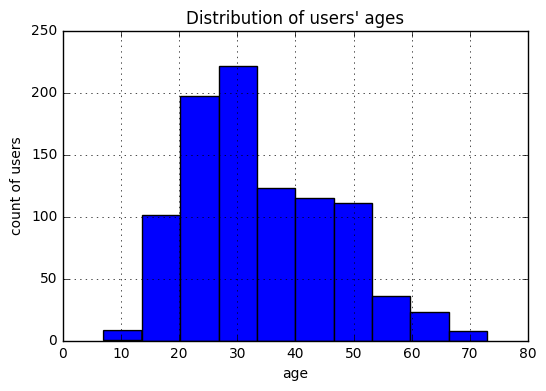

In [26]:
%matplotlib inline
users.age.hist(bins=10)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age')

In [30]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
# 年龄分组的labels
bins = range(0, 81, 10) # [0, 10, 20, 30, 40, 50, 60, 70, 80]
# 告诉我们bin是哪些
lens['age_group'] = pd.cut(lens.age, bins, right=False, labels=labels)
# 按照bin把数据cut下来，并附上labels，做成一个新的column，保存下来。
lens[['age', 'age_group']].drop_duplicates()[:5]
# 这只是个年龄对照表。我们每个年龄保留一个即可，不需要全部都有，所以要remove dup

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29


好，接下来，我们可以通过年龄分组，来比较电影评级了：

In [31]:
lens.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

整体来看，年轻观众更加偏激一点，老年观众的评分更加温和。

好，现在，我们用我们刚刚拿出来的最佳50部电影，来看看各个年龄层的评价情况：

In [32]:
lens.set_index('movie_id', inplace=True)

In [33]:
by_age = lens.ix[most_50.index].groupby(['title', 'age_group'])
# 这里，ix其实是loc和iloc的集合体。它会首先看label，如果没有label，就当成数字坐标看。
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

这样看，当然还不是很顺眼，我们还是喜欢表格的形式，对吧？

那我们这里，用unstack，把每个title group里的age，都分成每个row上的一个个column：

In [34]:
by_age.rating.mean().unstack(1)[10:20]

age_group,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
E.T. the Extra-Terrestrial (1982),NaN,3.680000,3.609091,3.806818,4.160000,4.368421,4.375000,NaN
"Empire Strikes Back, The (1980)",4.0,4.642857,4.311688,4.052083,4.100000,3.909091,4.250000,5.000000
"English Patient, The (1996)",5.0,3.739130,3.571429,3.621849,3.634615,3.774648,3.904762,4.500000
Fargo (1996),NaN,3.937500,4.010471,4.230769,4.294118,4.442308,4.000000,4.333333
Forrest Gump (1994),5.0,4.047619,3.785714,3.861702,3.847826,4.000000,3.800000,NaN
"Fugitive, The (1993)",NaN,4.320000,3.969925,3.981481,4.190476,4.240000,3.666667,NaN
"Full Monty, The (1997)",NaN,3.421053,4.056818,3.933333,3.714286,4.146341,4.166667,3.500000
"Godfather, The (1972)",NaN,4.400000,4.345070,4.412844,3.929412,4.463415,4.125000,NaN
Groundhog Day (1993),NaN,3.476190,3.798246,3.786667,3.851064,3.571429,3.571429,4.000000


unstack的作用，就是把多层的index，拉成1对1的表格形式。

不光光可以unstack(1)，我们也可以unstack(0):

In [37]:
by_age.rating.mean().unstack(0)

title,Air Force One (1997),Alien (1979),Aliens (1986),Apollo 13 (1995),Back to the Future (1985),"Birdcage, The (1996)",Braveheart (1995),Conspiracy Theory (1997),Contact (1997),Dead Man Walking (1995),...,Star Trek: First Contact (1996),Star Wars (1977),Terminator 2: Judgment Day (1991),"Terminator, The (1984)",Titanic (1997),Toy Story (1995),Twelve Monkeys (1995),Twister (1996),When Harry Met Sally... (1989),Willy Wonka and the Chocolate Factory (1971)
age_group,,,,,,,,,,,,,,,,,,,,,
0-9,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,5.000000,NaN,...,NaN,3.000000,NaN,NaN,5.000000,NaN,4.000000,NaN,NaN,NaN
10-19,3.647059,4.111111,4.050000,3.954545,4.037037,3.217391,4.384615,3.565217,3.693878,3.647059,...,3.576923,4.630435,4.173913,3.619048,4.611111,3.621622,3.916667,3.000000,3.500000,3.387097
20-29,3.666667,4.026087,4.087719,3.845455,3.720588,3.413223,4.194915,3.382114,3.785714,3.926606,...,3.641975,4.413043,3.969466,3.875969,4.336066,3.920635,3.847458,3.200000,4.000000,3.820144
30-39,3.570000,4.103448,3.887640,4.064935,3.915789,3.514286,4.156627,3.419355,3.847458,3.814286,...,3.737864,4.305732,3.977011,4.105882,4.236111,4.033058,3.788462,3.133333,3.882353,3.908046
40-49,3.555556,3.833333,3.526316,3.822222,4.036364,3.500000,4.051282,3.465116,3.866667,3.754386,...,3.760000,4.166667,4.212121,3.975610,3.984848,3.700000,3.653846,3.479167,3.825000,3.058824
50-59,3.750000,4.272727,4.235294,4.187500,3.500000,3.346154,3.956522,3.538462,3.739130,4.294118,...,3.272727,4.469388,3.941176,3.900000,4.210526,3.758621,3.650000,3.300000,3.904762,2.857143
60-69,3.666667,3.500000,3.800000,3.750000,3.857143,3.888889,3.714286,2.600000,3.777778,4.000000,...,3.000000,4.000000,3.500000,3.600000,3.846154,3.400000,3.000000,3.250000,3.800000,3.000000
70-79,3.666667,4.000000,3.000000,4.000000,4.000000,NaN,4.000000,NaN,NaN,NaN,...,5.000000,4.000000,NaN,NaN,4.000000,5.000000,NaN,NaN,4.500000,NaN


这样，他就横过来了。。